<a href="https://colab.research.google.com/github/jdmartinev/ST1613-AppliedML-/blob/main/Semana01/papel_piedra_tijera_tf2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Datos
Conjunto de datos tomados de http://www.laurencemoroney.com/rock-paper-scissors-dataset/

In [22]:
# Descargo los datos de entrenamiento
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1umVTyVJ1C0j3nPGQYSfSegLixqgCS95u&confirm=t' -O rps.zip
# Descargo los datos para pruebas
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1pv7Be32Bk3IO43BCcG7O95DYUKmzumuz&confirm=t' -O rps-test.zip

--2023-03-30 19:04:35--  https://docs.google.com/uc?export=download&id=1umVTyVJ1C0j3nPGQYSfSegLixqgCS95u&confirm=t
Resolving docs.google.com (docs.google.com)... 74.125.200.102, 74.125.200.100, 74.125.200.138, ...
Connecting to docs.google.com (docs.google.com)|74.125.200.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0g-6c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/5arnnf0l0htfk3oa9ckms6s6rdsj74ch/1680203025000/15315348669826032119/*/1umVTyVJ1C0j3nPGQYSfSegLixqgCS95u?e=download&uuid=c4314f07-9617-423d-af79-e6542d667f1d [following]
--2023-03-30 19:04:35--  https://doc-0g-6c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/5arnnf0l0htfk3oa9ckms6s6rdsj74ch/1680203025000/15315348669826032119/*/1umVTyVJ1C0j3nPGQYSfSegLixqgCS95u?e=download&uuid=c4314f07-9617-423d-af79-e6542d667f1d
Resolving doc-0g-6c-docs.googleusercontent.com (doc-0g-6c-docs.googleusercontent.com)... 74.125.130.132, 

In [ ]:
# Descomprimir los datos
!unzip "/content/rps.zip" -d "/content/"
!unzip "/content/rps-test.zip" -d "/content/"

!rm "/content/rps.zip"
!rm "/content/rps-test.zip"

In [24]:
import os

# Rutas a las carpetas
dir_papel = os.path.join('./rps/paper')
dir_piedra = os.path.join('./rps/rock')
dir_tijera = os.path.join('./rps/scissors')
# Archivos en las carpetas
archivos_papel = os.listdir(dir_papel)
archivos_piedra = os.listdir(dir_piedra)
archivos_tijera = os.listdir(dir_tijera)

print('Total de imagenes para entrenar (papel):', len(archivos_papel))
print('Total de imagenes para entrenar (piedra):', len(archivos_piedra))
print('Total de imagenes para entrenar (tijera):', len(archivos_tijera))

Total de imagenes para entrenar (papel): 840
Total de imagenes para entrenar (piedra): 840
Total de imagenes para entrenar (tijera): 840


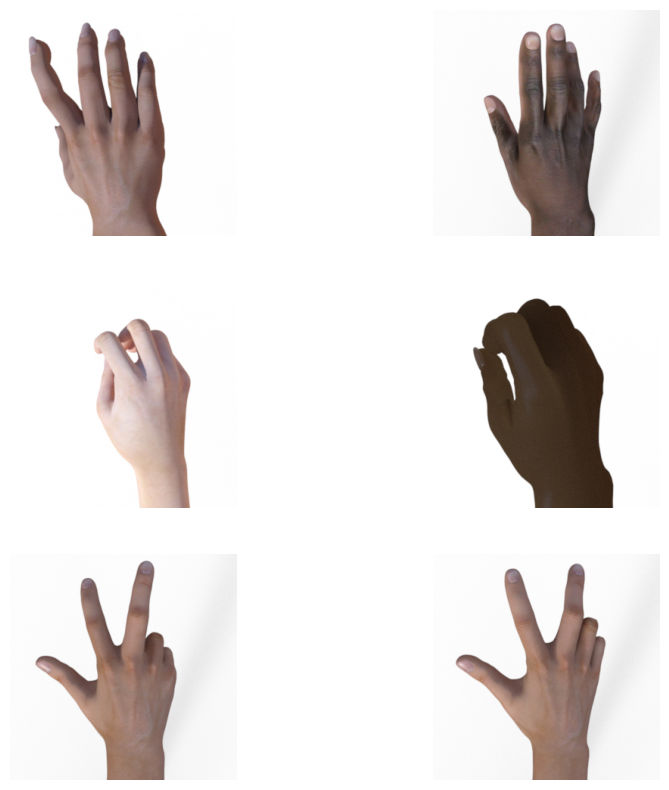

In [25]:
# Visualizar algunos ejemplos
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

indice = 2
prox_papel = [os.path.join(dir_papel, fname) 
                for fname in archivos_papel[:indice]]
prox_piedra = [os.path.join(dir_piedra, fname) 
                for fname in archivos_piedra[:indice]]
prox_tijera = [os.path.join(dir_tijera, fname) 
                for fname in archivos_tijera[:indice]]

plt.figure(figsize=(10, 10))
for i, imagen in enumerate(prox_papel + prox_piedra + prox_tijera):
  img = mpimg.imread(imagen)
  plt.subplot(3, 2, i+1)
  plt.imshow(img)
  plt.axis('Off')

## Modelo 1 - Red neuronal tradicional

In [ ]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

dir_train = './rps/'
datagen_train = ImageDataGenerator(rescale=1./255)

dir_val = './rps-test-set/'
datagen_val = ImageDataGenerator(rescale=1./255)

gen_train = datagen_train.flow_from_directory(
    dir_train, target_size=(150, 150), class_mode='categorical'
)
gen_val = datagen_val.flow_from_directory(
    dir_val, target_size=(150, 150), class_mode='categorical'
)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [ ]:
modelo1 = tf.keras.models.Sequential([
    # El tamaño esperado es 150x150 con 3 bytes de color
    tf.keras.layers.Flatten(input_shape=(150, 150, 3)),
    # 512 neuronas en la capa interna
    tf.keras.layers.Dense(512, activation='relu'),
    # Probabilidad de pertenencia a cada una de las 3 clases
    tf.keras.layers.Dense(3, activation='softmax')
])

modelo1.summary()

modelo1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 67500)             0         
                                                                 
 dense (Dense)               (None, 512)               34560512  
                                                                 
 dense_1 (Dense)             (None, 3)                 1539      
                                                                 
Total params: 34,562,051
Trainable params: 34,562,051
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Entrenamiento
historia1 = modelo1.fit(gen_train, epochs=15, validation_data=gen_val, batch_size = 32, verbose=1)
# Guardo el modelo
modelo1.save("modelo1.h5")

Epoch 1/15
79/79 [==============================] - 13s 164ms/step - loss: 0.0131 - accuracy: 0.9988 - val_loss: 3.8109 - val_accuracy: 0.5430
Epoch 2/15
79/79 [==============================] - 13s 164ms/step - loss: 0.0086 - accuracy: 0.9992 - val_loss: 3.8171 - val_accuracy: 0.5457
Epoch 3/15
79/79 [==============================] - 13s 159ms/step - loss: 0.0086 - accuracy: 0.9996 - val_loss: 3.8656 - val_accuracy: 0.5565
Epoch 4/15
79/79 [==============================] - 13s 160ms/step - loss: 0.0078 - accuracy: 0.9996 - val_loss: 4.0076 - val_accuracy: 0.5914
Epoch 5/15
79/79 [==============================] - 15s 187ms/step - loss: 0.0073 - accuracy: 1.0000 - val_loss: 4.0054 - val_accuracy: 0.5780
Epoch 6/15
79/79 [==============================] - 13s 159ms/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 3.9703 - val_accuracy: 0.5457
Epoch 7/15
79/79 [==============================] - 13s 171ms/step - loss: 0.0059 - accuracy: 0.9996 - val_loss: 4.0125 - val_accuracy: 0.5645

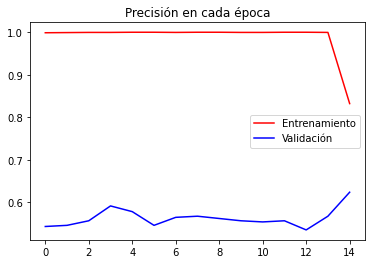

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epocas = range(len(acc))

  plt.plot(epocas, acc, 'r', label='Entrenamiento')
  plt.plot(epocas, val_acc, 'b', label='Validación')
  plt.title('Precisión en cada época')
  plt.legend(loc=0)
  
plot_history(historia1)

In [ ]:
modelo1_2 = tf.keras.models.Sequential([
    # El tamaño esperado es 150x150 con 3 bytes de color
    tf.keras.layers.Flatten(input_shape=(150, 150, 3)),
    # 512 neuronas en la capa interna
    tf.keras.layers.Dense(512, activation='relu'),
    # Probabilidad de pertenencia a cada una de las 3 clases
    tf.keras.layers.Dense(3, activation='softmax')
])

modelo1.summary()

modelo1_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 67500)             0         
                                                                 
 dense (Dense)               (None, 512)               34560512  
                                                                 
 dense_1 (Dense)             (None, 3)                 1539      
                                                                 
Total params: 34,562,051
Trainable params: 34,562,051
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Tratemos de darle más datos de entrada, usando transformaciones sobre las imágenes
datagen2_train = ImageDataGenerator(
    rescale = 1./255, rotation_range=40,
    width_shift_range=0.2, height_shift_range=0.2,
    shear_range=0.2, zoom_range=0.2,
    horizontal_flip=True, fill_mode='nearest'
)

gen2_train = datagen2_train.flow_from_directory(
    dir_train, target_size=(150, 150), class_mode='categorical'
)

Found 2520 images belonging to 3 classes.


In [ ]:
# Entrenamiento
historia1_2 = modelo1_2.fit(gen2_train, epochs=15, validation_data=gen_val, batch_size = 32, verbose=1)
# Guardo el modelo
modelo1_2.save("modelo1_2.h5")

Epoch 1/15
79/79 [==============================] - 25s 308ms/step - loss: 38.7461 - accuracy: 0.3655 - val_loss: 9.6663 - val_accuracy: 0.3495
Epoch 2/15
79/79 [==============================] - 23s 297ms/step - loss: 14.4280 - accuracy: 0.3488 - val_loss: 7.6905 - val_accuracy: 0.3333
Epoch 3/15
79/79 [==============================] - 24s 303ms/step - loss: 9.1128 - accuracy: 0.3460 - val_loss: 12.1173 - val_accuracy: 0.3333
Epoch 4/15
79/79 [==============================] - 24s 298ms/step - loss: 7.3484 - accuracy: 0.3575 - val_loss: 2.4755 - val_accuracy: 0.3683
Epoch 5/15
79/79 [==============================] - 23s 293ms/step - loss: 4.0408 - accuracy: 0.3599 - val_loss: 2.7907 - val_accuracy: 0.3495
Epoch 6/15
79/79 [==============================] - 23s 294ms/step - loss: 3.9595 - accuracy: 0.3778 - val_loss: 4.9836 - val_accuracy: 0.2930
Epoch 7/15
79/79 [==============================] - 23s 293ms/step - loss: 3.2490 - accuracy: 0.3516 - val_loss: 0.9880 - val_accuracy: 0.5

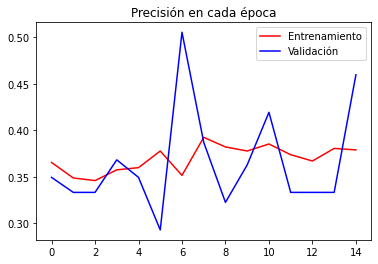

In [ ]:
plot_history(historia1_2)

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

def predict_files(model):
  uploaded = files.upload()
  for fn in uploaded.keys():
    # Imagenes de prueba final
    path = fn
    img = image.load_img(path, target_size=(150, 150))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])

    classes = model1.predict(images, batch_size=10)
    print(fn)
    print(classes)

predict_files(modelo1)

## Modelo 2 - Convoluciones

In [ ]:
modelo2 = tf.keras.models.Sequential([
    # El tamaño esperado es 150x150 con 3 bytes de color
    # La primera convolución
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # La segunda convolución
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # La tercera convolución
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # La cuarta convolución
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # La matriz de entrada la aplano para la red densa
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuronas en la capa interna
    tf.keras.layers.Dense(512, activation='relu'),
    # Probabilidad de pertenencia a cada una de las 3 clases
    tf.keras.layers.Dense(3, activation='softmax')
])

modelo2.summary()
modelo2.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)     

In [ ]:
historia2 = modelo2.fit(gen_train, epochs=15, batch_size = 32, validation_data=gen_val, verbose = 1)

modelo2.save("modelo2.h5")

Epoch 1/15
79/79 [==============================] - 25s 200ms/step - loss: 0.3916 - accuracy: 0.8198 - val_loss: 0.7698 - val_accuracy: 0.7984
Epoch 2/15
79/79 [==============================] - 14s 171ms/step - loss: 0.0330 - accuracy: 0.9897 - val_loss: 0.6299 - val_accuracy: 0.8091
Epoch 3/15
79/79 [==============================] - 13s 170ms/step - loss: 0.0153 - accuracy: 0.9952 - val_loss: 1.2119 - val_accuracy: 0.8414
Epoch 4/15
79/79 [==============================] - 14s 171ms/step - loss: 0.0133 - accuracy: 0.9972 - val_loss: 0.6609 - val_accuracy: 0.9220
Epoch 5/15
79/79 [==============================] - 14s 172ms/step - loss: 0.0073 - accuracy: 0.9984 - val_loss: 0.7868 - val_accuracy: 0.8952
Epoch 6/15
79/79 [==============================] - 15s 191ms/step - loss: 4.2735e-04 - accuracy: 1.0000 - val_loss: 0.8012 - val_accuracy: 0.9140
Epoch 7/15
79/79 [==============================] - 13s 168ms/step - loss: 1.1470e-04 - accuracy: 1.0000 - val_loss: 0.8205 - val_accuracy

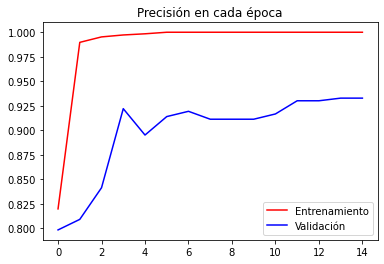

In [ ]:
plot_history(historia2)

In [ ]:
modelo2_2 = tf.keras.models.Sequential([
    # El tamaño esperado es 150x150 con 3 bytes de color
    # La primera convolución
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # La segunda convolución
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # La tercera convolución
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # La cuarta convolución
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # La matriz de entrada la aplano para la red densa
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuronas en la capa interna
    tf.keras.layers.Dense(512, activation='relu'),
    # Probabilidad de pertenencia a cada una de las 3 clases
    tf.keras.layers.Dense(3, activation='softmax')
])
modelo2_2.summary()
modelo2_2.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

In [ ]:
historia2_2 = modelo2_2.fit(gen2_train, epochs=15, batch_size = 32, validation_data=gen_val, verbose = 1)
modelo2_2.save("modelo2_2_conv.h5")

Epoch 1/15
79/79 [==============================] - 26s 320ms/step - loss: 1.0924 - accuracy: 0.3925 - val_loss: 0.8214 - val_accuracy: 0.8629
Epoch 2/15
79/79 [==============================] - 24s 304ms/step - loss: 0.7900 - accuracy: 0.6230 - val_loss: 0.3142 - val_accuracy: 0.9624
Epoch 3/15
79/79 [==============================] - 24s 306ms/step - loss: 0.4929 - accuracy: 0.7972 - val_loss: 0.3319 - val_accuracy: 0.8441
Epoch 4/15
79/79 [==============================] - 24s 310ms/step - loss: 0.3151 - accuracy: 0.8750 - val_loss: 0.1325 - val_accuracy: 0.9435
Epoch 5/15
79/79 [==============================] - 24s 306ms/step - loss: 0.2324 - accuracy: 0.9194 - val_loss: 0.1096 - val_accuracy: 0.9543
Epoch 6/15
79/79 [==============================] - 24s 306ms/step - loss: 0.1609 - accuracy: 0.9417 - val_loss: 0.0336 - val_accuracy: 1.0000
Epoch 7/15
79/79 [==============================] - 24s 308ms/step - loss: 0.1324 - accuracy: 0.9579 - val_loss: 0.0472 - val_accuracy: 0.9731

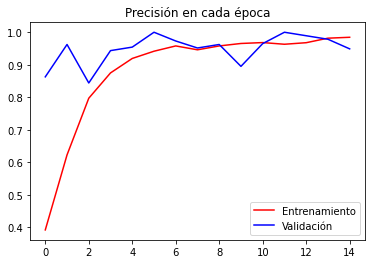

In [ ]:
plot_history(historia2_2)